In [66]:
!pip install scikit-learn
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set()

### Carico i dataset e mi organizzo i file in modo da avere le stats per ogni pookemon in battaglia

In [68]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pkmn = pd.read_csv('pokemon.csv')

train = train.join(pkmn.add_suffix('_1').set_index('#_1'), on='First_pokemon')
train = train.join(pkmn.add_suffix('_2').set_index('#_2'), on='Second_pokemon')

test = test.join(pkmn.add_suffix('_1').set_index('#_1'), on='First_pokemon')
test = test.join(pkmn.add_suffix('_2').set_index('#_2'), on='Second_pokemon')

train['WinnerTag'] = np.where((train['Winner'] == train['First_pokemon']), 1, 2)
test['WinnerTag'] = np.where((test['Winner'] == test['First_pokemon']), 1, 2)

train = train.drop(columns=['Winner'])
train = train.drop(columns=['First_pokemon'])
train = train.drop(columns=['Second_pokemon'])
train = train.drop(columns=['Name_1'])
train = train.drop(columns=['Name_2'])
train = train.drop(columns=['Type 1_1'])
train = train.drop(columns=['Type 2_1'])
train = train.drop(columns=['Type 1_2'])
train = train.drop(columns=['Type 2_2'])


test = test.drop(columns=['Winner'])
test = test.drop(columns=['First_pokemon'])
test = test.drop(columns=['Second_pokemon'])
test = test.drop(columns=['Name_1'])
test = test.drop(columns=['Name_2'])
test = test.drop(columns=['Type 1_1'])
test = test.drop(columns=['Type 2_1'])
test = test.drop(columns=['Type 1_2'])
test = test.drop(columns=['Type 2_2'])


In [69]:
train

,HP_1,Attack_1,Defense_1,Sp. Atk_1,Sp. Def_1,Speed_1,Generation_1,Legendary_1,HP_2,Attack_2,Defense_2,Sp. Atk_2,Sp. Def_2,Speed_2,Generation_2,Legendary_2,WinnerTag
0,65,155,120,65,90,105,1,False,79,115,70,125,80,111,5,True,2
1,55,55,55,85,55,30,5,False,45,75,60,40,30,50,3,False,2
2,55,40,40,65,45,35,2,False,90,120,100,150,120,100,4,True,2
3,70,100,115,30,65,30,2,False,78,92,75,74,63,118,6,False,2
4,95,60,79,100,125,81,3,False,110,123,65,100,65,65,5,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30795,75,80,85,110,90,50,1,False,60,55,50,40,55,45,1,False,1
30796,64,66,68,81,76,50,4,False,68,65,65,125,115,80,3,False,2
30797,63,60,55,50,50,71,1,False,65,105,60,60,70,95,1,False,2
30798,91,72,90,129,90,108,5,False,85,110,90,45,90,80,5,False,1


## Procedo allora alla costruzione di un modello di decision tree per la classificazione dei pokemon in vincente o perdente

In [70]:
y_train = train["WinnerTag"].values
x_train = train.drop(["WinnerTag"], axis=1).values
y_test = test["WinnerTag"].values
x_test = test.drop(["WinnerTag"], axis=1).values

In [71]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.925


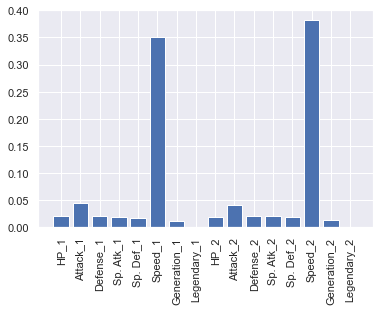

In [72]:
plt.bar(test.columns.drop(["WinnerTag"]), dt.feature_importances_)
plt.xticks(test.columns.drop(["WinnerTag"]), test.columns.drop(["WinnerTag"]), rotation='vertical')
plt.show()

Lanciando un occhio al grafico si vede come le ipotesi precedentemente supposte siano attuali

Proviamo, giusto per curiosità, a vedere le la velocità possa essere considerata la statistica piu importante per un combattimento.
Rimuovo tutte le altre statistiche e vedo...

In [76]:
train = train.drop(columns=['Legendary_1'])
train = train.drop(columns=['Legendary_2'])
train = train.drop(columns=['HP_1'])
train = train.drop(columns=['HP_2'])
train = train.drop(columns=['Attack_1'])
train = train.drop(columns=['Attack_2'])
train = train.drop(columns=['Defense_1'])
train = train.drop(columns=['Defense_2'])
train = train.drop(columns=['Sp. Atk_1'])
train = train.drop(columns=['Sp. Atk_2'])
train = train.drop(columns=['Sp. Def_1'])
train = train.drop(columns=['Sp. Def_2'])

test = test.drop(columns=['Legendary_1'])
test = test.drop(columns=['Legendary_2'])
test = test.drop(columns=['HP_1'])
test = test.drop(columns=['HP_2'])
test = test.drop(columns=['Attack_1'])
test = test.drop(columns=['Attack_2'])
test = test.drop(columns=['Defense_1'])
test = test.drop(columns=['Defense_2'])
test = test.drop(columns=['Sp. Atk_1'])
test = test.drop(columns=['Sp. Atk_2'])
test = test.drop(columns=['Sp. Def_1'])
test = test.drop(columns=['Sp. Def_2'])

Accuracy on training set: 0.971
Accuracy on test set: 0.907


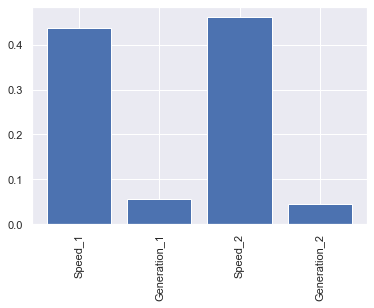

In [77]:
y_train = train["WinnerTag"].values
x_train = train.drop(["WinnerTag"], axis=1).values
y_test = test["WinnerTag"].values
x_test = test.drop(["WinnerTag"], axis=1).values

dt = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(x_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(x_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(x_test, y_test)))

plt.bar(test.columns.drop(["WinnerTag"]), dt.feature_importances_)
plt.xticks(test.columns.drop(["WinnerTag"]), test.columns.drop(["WinnerTag"]), rotation='vertical')
plt.show()

## Conclusioni

Il ragionamento fatto nella preparazione sembra filare, le statisttiche sono la chiave per vincere, ma alcune sono piu importanti di altre.
Come è stato studiato, la velocità è decisamente la piu importante se si vuole vincere poiche permette di attaccare per primi e dunque permette di concludere il combattimento in una mossa sola.
Si è perovato infatti a confrontare i risultati utilizzando tutte le statistiche e poi solo la statistica di velocità, e il risultato ottenuto sembra essere paragonabile.